[7.60e+07 8.40e+07 9.20e+07 9.90e+07 1.07e+08 1.15e+08 1.22e+08 1.30e+08
 1.43e+08 1.51e+08 1.58e+08 1.66e+08 1.74e+08 1.81e+08 1.89e+08 1.97e+08
 2.04e+08 2.12e+08 2.20e+08 2.27e+08] Hz
[110. 153. 200.] MHz


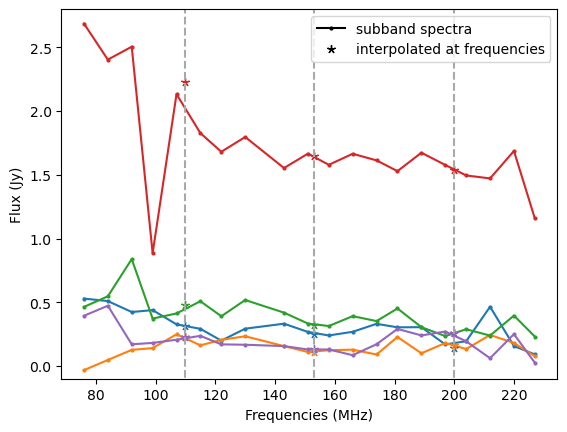

In [59]:
  >>> import os
  >>> from pyradiosky import SkyModel
  >>> from pyradiosky.data import DATA_PATH
  >>> from astropy import units
  >>> from matplotlib.lines import Line2D
  >>> import matplotlib.pyplot as plt # doctest: +SKIP
  >>> sm = SkyModel()

  >>> filename = os.path.join(DATA_PATH, "gleam_50srcs.vot")
  >>> sm.read_gleam_catalog(filename)

  >>> print(sm.freq_array)
  # [7.60e+07 8.40e+07 9.20e+07 9.90e+07 1.07e+08 1.15e+08 1.22e+08 1.30e+08
  #  1.43e+08 1.51e+08 1.58e+08 1.66e+08 1.74e+08 1.81e+08 1.89e+08 1.97e+08
  #  2.04e+08 2.12e+08 2.20e+08 2.27e+08] Hz

  >>> sm_new = sm.at_frequencies(freqs=[110, 153, 200]*units.MHz, inplace=False, freq_interp_kind="cubic",
  ...                       nan_handling="clip", run_check=True, atol=None)

  >>> print(sm_new.freq_array)
  # [110. 153. 200.] MHz


  >>> _ = plt.plot(sm.freq_array.to("MHz"), sm.stokes[0,:,0:5].value, marker='o', markersize=2)
  >>> plt.gca().set_prop_cycle(None)
  >>> _ = plt.plot(sm_new.freq_array, sm_new.stokes[0,:,0:5].value, marker=(5, 2), linestyle='None')
  >>> plt.autoscale()
  >>> _ = plt.xlabel("Frequencies (MHz)")
  >>> _ = plt.ylabel("Flux (Jy)")
  >>> _ = plt.vlines(sm_new.freq_array, ymin=-1, ymax = 3, linestyle="dashed", colors="darkgrey")
  >>> _ = plt.ylim(-0.1,2.8)
  >>> legend_elements = [
  ...    Line2D([0], [0], color="black", marker='o', markersize=2, label="subband spectra"),
  ...    Line2D([0], [0], color="black", marker=(5, 2), linestyle='None', label="interpolated at frequencies"),
  ... ]
  >>> _ = plt.legend(handles=legend_elements)
  >>> plt.show() # doctest: +SKIP


